In [107]:
#collecting the data
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
df=pdr.DataReader('TSLA','yahoo',start='2018-01-01', end='2021-12-05')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998
...,...,...,...,...,...,...
2021-11-29,1142.670044,1100.189941,1100.989990,1136.989990,19464500.0,1136.989990
2021-11-30,1168.000000,1118.000000,1144.369995,1144.760010,27092000.0,1144.760010
2021-12-01,1172.839966,1090.760010,1160.699951,1095.000000,22816800.0,1095.000000


In [108]:
df1=df['Close'] #here we are taking the close column for the data
df1.shape
#df1

(989,)

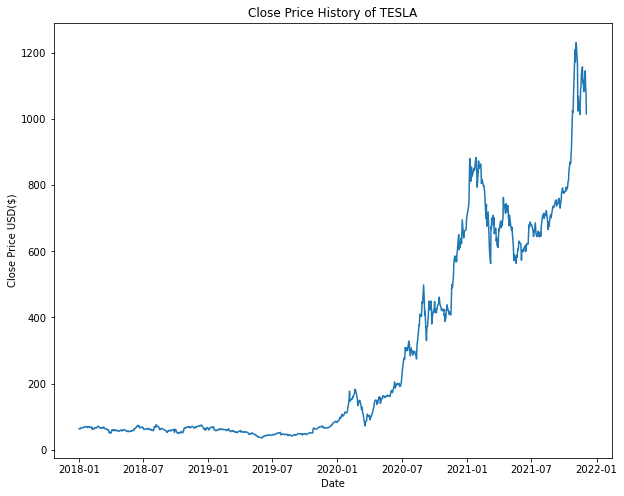

In [109]:
plt.figure(figsize=(10,8))
plt.title('Close Price History of TESLA')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price USD($)', fontsize=10)
plt.show()

In [110]:
#LSTM are sensitive to the scale of the data. So we apply minmax scaler.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.02370959],
       [0.02316023],
       [0.02271974],
       [0.02304801],
       [0.0263693 ],
       [0.02591373],
       [0.02609964],
       [0.02662723],
       [0.02633748],
       [0.02698063],
       [0.02816979],
       [0.027736  ],
       [0.02864881],
       [0.02890674],
       [0.02911275],
       [0.02795708],
       [0.02657531],
       [0.02744792],
       [0.02856674],
       [0.02794536],
       [0.02936733],
       [0.02851984],
       [0.02759866],
       [0.02581994],
       [0.02596063],
       [0.02780802],
       [0.0228219 ],
       [0.02201629],
       [0.02290565],
       [0.02423383],
       [0.02400772],
       [0.02597738],
       [0.02621521],
       [0.02609462],
       [0.02584841],
       [0.02800398],
       [0.02898881],
       [0.02988822],
       [0.02881127],
       [0.02748309],
       [0.02545146],
       [0.02615324],
       [0.02585678],
       [0.02499422],
       [0.02568092],
       [0.02514496],
       [0.02482171],
       [0.027

In [111]:
df1.shape

(989, 1)

In [142]:
## splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [113]:
train_data

array([[0.02370959],
       [0.02316023],
       [0.02271974],
       [0.02304801],
       [0.0263693 ],
       [0.02591373],
       [0.02609964],
       [0.02662723],
       [0.02633748],
       [0.02698063],
       [0.02816979],
       [0.027736  ],
       [0.02864881],
       [0.02890674],
       [0.02911275],
       [0.02795708],
       [0.02657531],
       [0.02744792],
       [0.02856674],
       [0.02794536],
       [0.02936733],
       [0.02851984],
       [0.02759866],
       [0.02581994],
       [0.02596063],
       [0.02780802],
       [0.0228219 ],
       [0.02201629],
       [0.02290565],
       [0.02423383],
       [0.02400772],
       [0.02597738],
       [0.02621521],
       [0.02609462],
       [0.02584841],
       [0.02800398],
       [0.02898881],
       [0.02988822],
       [0.02881127],
       [0.02748309],
       [0.02545146],
       [0.02615324],
       [0.02585678],
       [0.02499422],
       [0.02568092],
       [0.02514496],
       [0.02482171],
       [0.027

In [143]:
#convert an array values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]       ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)       

In [144]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train, y_train =create_dataset(train_data,time_step)
X_test, ytest=create_dataset(test_data,time_step)

In [145]:
print(X_train)

[[0.02370959 0.02316023 0.02271974 ... 0.01608554 0.01676554 0.01656121]
 [0.02316023 0.02271974 0.02304801 ... 0.01676554 0.01656121 0.01672869]
 [0.02271974 0.02304801 0.0263693  ... 0.01656121 0.01672869 0.01755106]
 ...
 [0.10967443 0.10399994 0.10046427 ... 0.22076413 0.22407034 0.22896267]
 [0.10399994 0.10046427 0.08374898 ... 0.22407034 0.22896267 0.22136374]
 [0.10046427 0.08374898 0.08190495 ... 0.22896267 0.22136374 0.22139725]]


In [146]:
print(X_train.shape), print(y_train.shape)

(541, 100)
(541,)


(None, None)

In [147]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [148]:
###Create the Stacked LSTM model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [149]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [150]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.fit(X_train, y_train, validation_data=(X_test,ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
9/9 [==============================] - 6s 231ms/step - loss: 0.0013 - val_loss: 0.0271
Epoch 2/100
9/9 [==============================] - 1s 124ms/step - loss: 2.8829e-04 - val_loss: 0.0128
Epoch 3/100
9/9 [==============================] - 1s 121ms/step - loss: 2.1267e-04 - val_loss: 0.0059
Epoch 4/100
9/9 [==============================] - 1s 122ms/step - loss: 1.9204e-04 - val_loss: 0.0142
Epoch 5/100
9/9 [==============================] - 1s 120ms/step - loss: 1.9964e-04 - val_loss: 0.0040
Epoch 6/100
9/9 [==============================] - 1s 122ms/step - loss: 1.7222e-04 - val_loss: 0.0131
Epoch 7/100
9/9 [==============================] - 1s 126ms/step - loss: 1.4517e-04 - val_loss: 0.0115
Epoch 8/100
9/9 [==============================] - 1s 123ms/step - loss: 1.3372e-04 - val_loss: 0.0154
Epoch 9/100
9/9 [==============================] - 1s 119ms/step - loss: 1.3199e-04 - val_loss: 0.0213
Epoch 10/100
9/9 [==============================] - 1s 120ms/step - loss: 1.1

Epoch 80/100
9/9 [==============================] - 1s 137ms/step - loss: 5.0687e-05 - val_loss: 0.0221
Epoch 81/100
9/9 [==============================] - 1s 136ms/step - loss: 5.4445e-05 - val_loss: 0.0180
Epoch 82/100
9/9 [==============================] - 1s 138ms/step - loss: 5.5790e-05 - val_loss: 0.0459
Epoch 83/100
9/9 [==============================] - 1s 142ms/step - loss: 5.6355e-05 - val_loss: 0.0184
Epoch 84/100
9/9 [==============================] - 1s 137ms/step - loss: 5.9366e-05 - val_loss: 0.0285
Epoch 85/100
9/9 [==============================] - 1s 137ms/step - loss: 5.2580e-05 - val_loss: 0.0259
Epoch 86/100
9/9 [==============================] - 1s 136ms/step - loss: 4.9948e-05 - val_loss: 0.0289
Epoch 87/100
9/9 [==============================] - 1s 139ms/step - loss: 5.2344e-05 - val_loss: 0.0290
Epoch 88/100
9/9 [==============================] - 1s 140ms/step - loss: 4.5738e-05 - val_loss: 0.0306
Epoch 89/100
9/9 [==============================] - 1s 137ms/ste

In [165]:
#lets do the prediction and check the performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [166]:
#Transform back to the original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [167]:
##Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

100.42642459187311

In [168]:
math.sqrt(mean_squared_error(ytest,test_predict))

1030.42456556675

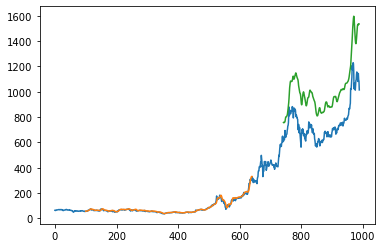

In [169]:
###ploting
##shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

#shift test prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict

#predict baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [156]:
len(test_data)

347

In [170]:
x_input=test_data[247:].reshape(1,-1)
x_input.shape

(1, 100)

In [171]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [172]:

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1    
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1      
print(lst_output)
               

[1.2269267]
101
1 day input [0.50951997 0.51119485 0.52315352 0.51879044 0.5137407  0.50881655
 0.52074169 0.50998899 0.51183132 0.53726435 0.54551316 0.5643304
 0.56438903 0.5653772  0.56848412 0.55547866 0.56775555 0.56459839
 0.56278116 0.57486541 0.5706112  0.54465057 0.52751659 0.54701216
 0.53401508 0.53970133 0.56150824 0.56334223 0.56561171 0.55720378
 0.56621464 0.58211761 0.58614569 0.58478071 0.58335706 0.58434523
 0.60054966 0.60134524 0.6021743  0.58660633 0.59224228 0.59349005
 0.60298664 0.60395805 0.60605165 0.58149791 0.58921075 0.59972899
 0.60115265 0.61852952 0.63274084 0.62118419 0.62432459 0.6194423
 0.61922456 0.62450885 0.62372165 0.6255305  0.63462508 0.62782508
 0.63322657 0.64476646 0.64925518 0.65531823 0.67601138 0.69868921
 0.69379859 0.69507985 0.71869565 0.7318267  0.82828298 0.82289825
 0.83916969 0.87198062 0.90293235 0.98214573 0.95150385 0.98655905
 1.         0.99345117 0.9439166  0.82714407 0.86436822 0.86065004
 0.83545151 0.81867757 0.85329729 0.

10 day output [[2.4633832]]
11 day input [0.54551316 0.5643304  0.56438903 0.5653772  0.56848412 0.55547866
 0.56775555 0.56459839 0.56278116 0.57486541 0.5706112  0.54465057
 0.52751659 0.54701216 0.53401508 0.53970133 0.56150824 0.56334223
 0.56561171 0.55720378 0.56621464 0.58211761 0.58614569 0.58478071
 0.58335706 0.58434523 0.60054966 0.60134524 0.6021743  0.58660633
 0.59224228 0.59349005 0.60298664 0.60395805 0.60605165 0.58149791
 0.58921075 0.59972899 0.60115265 0.61852952 0.63274084 0.62118419
 0.62432459 0.6194423  0.61922456 0.62450885 0.62372165 0.6255305
 0.63462508 0.62782508 0.63322657 0.64476646 0.64925518 0.65531823
 0.67601138 0.69868921 0.69379859 0.69507985 0.71869565 0.7318267
 0.82828298 0.82289825 0.83916969 0.87198062 0.90293235 0.98214573
 0.95150385 0.98655905 1.         0.99345117 0.9439166  0.82714407
 0.86436822 0.86065004 0.83545151 0.81867757 0.85329729 0.88200475
 0.88817667 0.92224376 0.93883338 0.8987703  0.90460723 0.87606733
 0.92218508 0.928692   

20 day output [[2.541671]]
21 day input [0.5706112  0.54465057 0.52751659 0.54701216 0.53401508 0.53970133
 0.56150824 0.56334223 0.56561171 0.55720378 0.56621464 0.58211761
 0.58614569 0.58478071 0.58335706 0.58434523 0.60054966 0.60134524
 0.6021743  0.58660633 0.59224228 0.59349005 0.60298664 0.60395805
 0.60605165 0.58149791 0.58921075 0.59972899 0.60115265 0.61852952
 0.63274084 0.62118419 0.62432459 0.6194423  0.61922456 0.62450885
 0.62372165 0.6255305  0.63462508 0.62782508 0.63322657 0.64476646
 0.64925518 0.65531823 0.67601138 0.69868921 0.69379859 0.69507985
 0.71869565 0.7318267  0.82828298 0.82289825 0.83916969 0.87198062
 0.90293235 0.98214573 0.95150385 0.98655905 1.         0.99345117
 0.9439166  0.82714407 0.86436822 0.86065004 0.83545151 0.81867757
 0.85329729 0.88200475 0.88817667 0.92224376 0.93883338 0.8987703
 0.90460723 0.87606733 0.92218508 0.928692   0.887021   0.87831161
 0.82000069 1.22692668 1.29173136 1.41082466 1.55675685 1.71334088
 1.87081194 2.02198529 

29 day output [[2.4950142]]
[[1.2269266843795776], [1.291731357574463], [1.4108246564865112], [1.556756854057312], [1.7133408784866333], [1.870811939239502], [2.0219852924346924], [2.1608192920684814], [2.2824578285217285], [2.3837156295776367], [2.463383197784424], [2.52211332321167], [2.561969041824341], [2.585833787918091], [2.5968854427337646], [2.5982112884521484], [2.592587471008301], [2.5823802947998047], [2.5695269107818604], [2.5555641651153564], [2.54167103767395], [2.528719902038574], [2.5173208713531494], [2.507866382598877], [2.500566244125366], [2.4954843521118164], [2.4925642013549805], [2.4916622638702393], [2.4925649166107178], [2.495014190673828]]


In [173]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [174]:
import matplotlib.pyplot as plt
len(df1)

989

In [175]:
df3=df1.tolist()
df3.extend(lst_output)

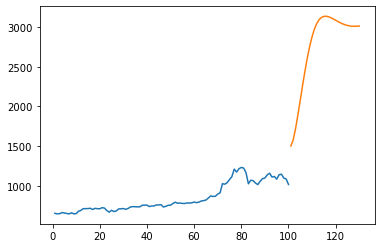

In [176]:
plt.plot(day_new,scaler.inverse_transform(df1[889:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [177]:
df3=df1.tolist()
df3

[[0.023709592073617246],
 [0.023160230013987718],
 [0.0227197359908426],
 [0.02304801405936499],
 [0.026369295803179524],
 [0.02591372975925523],
 [0.026099641442439793],
 [0.02662722606127839],
 [0.026337477802552016],
 [0.026980629488730028],
 [0.02816979212182088],
 [0.027736000324109146],
 [0.02864880637102688],
 [0.028906736629125747],
 [0.02911274859945371],
 [0.027957084315216284],
 [0.026575307773507487],
 [0.02744791963529518],
 [0.028566737652540877],
 [0.027945360212575425],
 [0.029367330939414266],
 [0.02851984124197745],
 [0.02759865901055717],
 [0.02581993693812837],
 [0.02596062616981866],
 [0.02780801889902345],
 [0.022821904996472006],
 [0.022016286637812764],
 [0.02290564767402716],
 [0.02423382877431752],
 [0.02400771651684616],
 [0.025977378538823745],
 [0.026215208509779216],
 [0.026094619565232326],
 [0.025848413409774312],
 [0.028003980725779712],
 [0.028988811736768504],
 [0.02988821972197623],
 [0.028811269848929733],
 [0.027483091943217748],
 [0.02545146148989

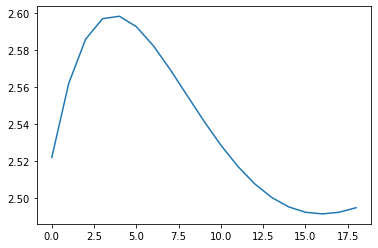

In [178]:
df3.extend(lst_output)
plt.plot(df3[1000:])

In [179]:
df3=scaler.inverse_transform(df3).tolist()

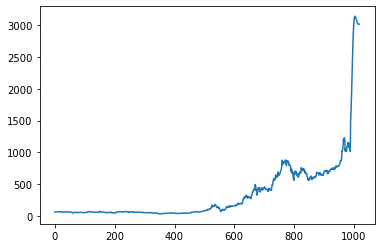

In [180]:
plt.plot(df3)